# Tarea 4

Miguel Raz [@miguelraz](https://github.com/miguelraz)

Claudio Pierard [@cpierard](https://github.com/cpierard)

**Envío del PR inicial:** lunes 26 de septiembre

**Aceptación del PR:** lunes 10 de octubre

In [4]:
using Plots, LaTeXStrings, DualNumbers
pyplot()

Plots.PyPlotBackend()

**Ejercicio 0:** Velocidad de convergencia

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

  Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto sea neutral (ni atractivo ni repulsivo)?

  En los dos últimos incisos, el interés es en los ciclos de periodo 2.

**Ejercicio 1:**

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.



*Hint:* Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 

Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

In [5]:
"""
    ciclosestables!(xx, f, nit, nout, cc, x0)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0,cc)` tenga sentido. La idea es los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`. 
"""
function ciclosestables!(xx, f, nit, nout, cc, x0)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
    #x0 = 0.0
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    return nothing
end

"""
    diagbifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diagbifurc(f, nit, nout, crange, x0)
    xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c, x0)
        ff[:,ic] = xx
    end
    
    return ff
end

diagbifurc (generic function with 1 method)

In [6]:
"""
    bifurcation_function(f, x0, n, range_r, k)
    OUT: r_par, orbit

bifurcation_function genera un arreglo de valores de "x" y un arreglo de valores "c", los que grafican el mapeo
de bifurcaciones. `f` es una función, `x0` es un valor inicial para todas las orbitas que se van a calcular, n es el
número de iteraciones que se hacen sin guardar, `k` es el número de iteraciones que se hacen guardando los valores de 
x en un arreglo, y `range_r` es el rango de los parámetros r, para los que se quiere hacer el diagrama de 
bifurcaciones.
"""


function bifurcation_function(f, x0, n, range_r, k)
    
    orbit = Float64[]
    r_par = Float64[]
    
    for r in range_r
        
        solution = []
        #steps = Int[0]
        x_old = x0
        
        for j in 1:n
            
            x_new = f(x_old, r)
            x_old = x_new
            
        end
        
        for i in 1:k

            x_new = f(x_old, r)
            push!(solution, x_new)
            #push!(steps, i)
            x_old = x_new

        end
            
        #deleteat!(solution, 1:k) #Remove the transient.
        rs = similar(solution)
        
        for i in 1:length(solution)
            
            rs[i] = r
            
        end
        
        append!(orbit, solution)
        append!(r_par, rs)
        
    end
    
    return r_par, orbit
    
end

bifurcation_function (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot



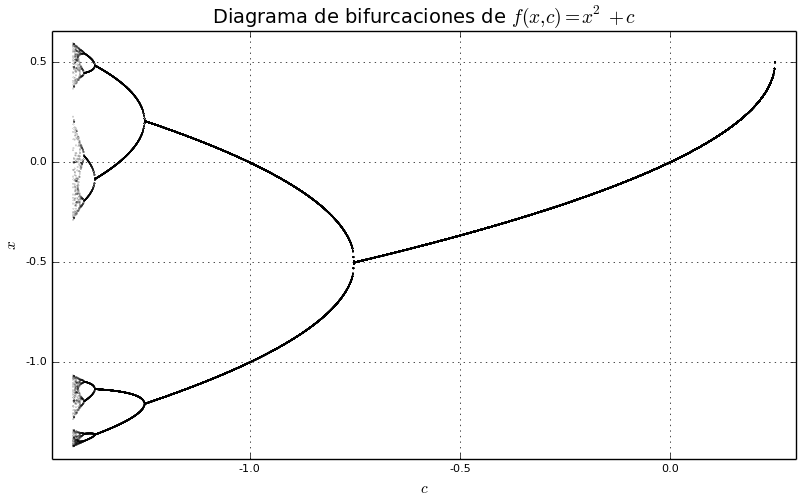

In [7]:
f(x,c) = x^2 + c #función anónima para la cual se quiere calcular los parámetros de bifurcación.

#Abajo se genera el diagrama de bifurcación para la función de arriba.
c_parametro, orbita = bifurcation_function(f, 0.5, 1000, -1.42:1e-3:.25, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), 
yaxis=(L"x"), size=(800,500))
title!(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$")

In [8]:
"""
    itera_funcion_anonym(n)

Esta función declara una función anonima tipo `f(x,c) = x^2 + c`. Variando el parametro n (con n ∈ Naturales), la 
función declara una función anónima de la composición de la función f con sigo misma, un n número de veces. Ejemplo:

n = 3
f_out = ((x^2 + c)^2 + c)^2 + c

"""


function itera_funcion_anonym(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
end 

itera_funcion_anonym (generic function with 1 method)

In [9]:
"""
    find_bifurcation(FF, CC)

Dadas dos matrices calculadas con diagbifurc, que contienen los ultimos valores de la orbitas correspondientes a cada 
parámetro c (`FF`) y los parámetros c (`CC`), `find_bifurcation` calcula los parámetros c en los que hay una bifurcación
para la función `f(x,c) = x^2 +c.` Esta función regresa un arreglo con todas las bifurcaciones y su doblamineto de 
periodo correspondiente.
"""

function find_bifurcation(FF, CC)
    
    bifurcaciones = Any[] #Esto va a ser un arreglo de arreglos.
    n = 0  #contador que nos ayuda a ver el doblamiento de periodo.
    
    for i in 1:length(FF)
        
        x_i = FF[i] #El método consiste en comparar el último iterado del arreglo FF contra la evaluación de ese
        x_e = itera_funcion_anonym(2^n)(x_i, CC[i])  # valor en la función f iterada 2^n veces. 
            
        if abs(x_i - x_e) > 1e-7 # si la diferencia entre esos de valores es mmayor que e-7, entonces hay una bifucación.
            
            n += 1  #Contador aumenta en una unidad.
            push!(bifurcaciones, [CC[i], 2^n]) #añade la bifurcación y su pariodo al arreglo que regresa la función.
            
        end
        
    end
    
    bifurcaciones
    
end  

find_bifurcation (generic function with 1 method)

In [254]:
crange = -0.73:-1/2^15:-1.4012 #rango de parámetros donde estámos seguros de encontrar bifurcaciones, (esto reduce
# la cantidad de cálculos que tiene que hacer la computadora).

ff = diagbifurc(itera_funcion_anonym(1), 50000, 1, crange, 0.0); #matriz de 1×n con las órbitas y los parámetros. 
#Se hizo que iterara 50000 veces la función.

cc = ones(size(ff)[1])*crange';

In [255]:
ff #matriz 1 × 21994

1x21994 Array{Float64,2}:
 -0.489949  -0.489965  -0.48998  -0.489996  …  -1.39992  -1.39996  -1.39991

In [250]:
@time Q_c_1 = find_bifurcation(ff, cc) 

 59.228348 seconds (2.12 M allocations: 124.425 MB, 0.10% gc time)


9-element Array{Any,1}:
 [-0.749927978515625,2.0]  
 [-1.249927978515625,4.0]  
 [-1.368092041015625,8.0]  
 [-1.394031982421875,16.0] 
 [-1.399647216796875,32.0] 
 [-1.40083740234375,64.0]  
 [-1.401112060546875,128.0]
 [-1.401142578125,256.0]   
 [-1.401173095703125,512.0]

¡Se obtienen los valores de los parámetros `c` donde hay bifurcaciones! Comparados con [Wikipedia](https://en.wikipedia.org/wiki/Feigenbaum_constants#The_first_constant), estos se parecen batante. 


> **Observación:** Se había hecho otro método donde se usaba el método de Newton para refinar los últimos valores de las órbitas, sin embargo, éste 20 veces más lento y sólo podía encontrar las primeras tres bifurcaciones, por eso decidí no ponerlo en esta tarea. 

In [10]:
"""
    feigenbaum_const(A)

Dado un arreglo que contiene los parámetros donde hay bifurcaciones, esta función calcula las aproximaciones a la
constante de Feigenbaum.
"""

function feigenbaum_const(A)
    ratio = Float64[]
    
    for i in 3:length(A)
        
        r = (A[i-1][1] - A[i-2][1])/(A[i][1] - A[i-1][1])
        push!(ratio, r)
        
    end
    
    ratio
    
end 

feigenbaum_const (generic function with 1 method)

In [256]:
feigenbaum_const(Q_c_1) #Le damos como argumento el arreglo que contiene las bifurcaciones calculado arriba.

7-element Array{Float64,1}:
 4.2314 
 4.55529
 4.61957
 4.71795
 4.33333
 9.0    
 1.0    

**Resultados**

La siguiente tabla muestra las bifucaciones para $f(x,c) = x^2 +c$, con su respectiva aproximación a la constante de Feigenbaum y el doblamiento de periodo al que corresponden.

| n | Periodo | Bifurcación | Proporción |
|:---------- | ---------- |:------------:|:------------:|
| `1` | 2 | -0.749927978515625 | - |
| `2` | 4 | -1.249927978515625 | - |
| `3` | 8 | -1.368092041015625 | 4.2314 |
| `4` | 16 | -1.399647216796875 | 4.55529 |
| `5` | 32 | -1.399647216796875 | 4.61957 |
| `6` | 64 | -1.40083740234375 | *4.71795* |
| `7` | 128 | -1.401112060546875 | *4.33333* |
| `8` | 256 | -1.401142578125 | *9.0* |
| `9` | 512 | -1.401173095703125 | *1.0* |

> Me faltan datos para determinar a que converge la secuencia $\{f0,f1,f2,…\}$, pero con los datos obtenidos se puede apreciar que deber ser aproximadamente $4.7$. Sin embargo, sabemos que tiene que converger a $\delta = 4.669201609...$. 

> A partir del doblamiento de periodo $64$ en adelante, se puede ver que la aproximación de la constante ya no es buena. Esto se debe al método que estamos usando para obtener las bifurcaciones, ya que el criterio para determinar si hay una bifurcación se basa en comparar la distancia entre el último valor de la orbita y el último punto de la orbita en la función `f` iterada 2^n veces, con $1e-7$. El problema surge en los periodos grandes, ya que para esos parámetro las oscilaciones son bastante paequeñas y puede que la tolerancia de `1e-7`, no sea sufieciente para encontrar el parámetro, sin embargo, si se hace más pequeña esta tolerancia, el método falla en encontrar las primeras bifurcaciones.

**Ejercicio 2:**

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

In [11]:
S_c(x,c) = c*sin(x) #función para la cuál se quieren conocer las bifurcaciones.

S_c (generic function with 1 method)


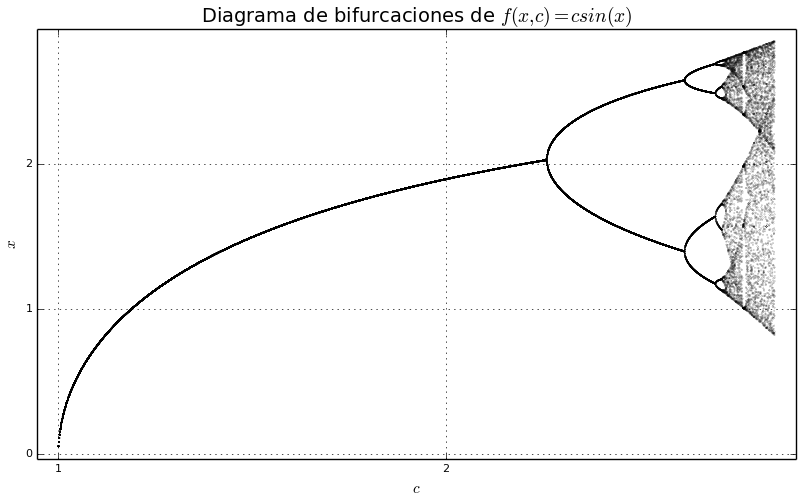

In [12]:
#Diagrama de bifurcaciones
c_parametro, orbita = bifurcation_function(S_c, 0.5, 1000, 1:1e-3:2.85, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), 
size=(800,500))
title!(L"Diagrama de bifurcaciones de $f(x,c) = c sin(x)$")


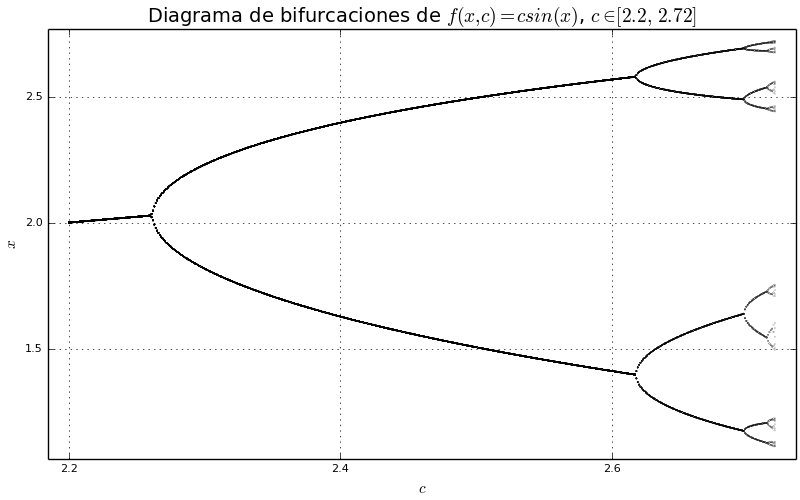

In [13]:
c_parametro, orbita = bifurcation_function(S_c, 0.5, 1000, 2.2:1e-3:2.72, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))
title!(L"Diagrama de bifurcaciones de $f(x,c) = c sin(x)$, $c \in [2.2, \ 2.72]$")

In [14]:
"""
itera_funcion_sine(n)

Esta función declara una función anonima tipo `f(x,c) = c*sin(x)`. Variando el parametro n (con n ∈ Naturales), la 
función declara una función anónima de la composición de la función f con sigo misma, un n número de veces. Ejemplo:

n = 3
f_out = c*sin(c*sin(c*sin(x)))

"""



function itera_funcion_sine(n)
    
    x = "c*sin(x)"

    for i in 1:n-1

        x = "c*sin($x)"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
    #ex_ret
end 

itera_funcion_sine (generic function with 1 method)

In [15]:
"""
    find_bifurcation(FF, CC)

Dadas dos matrices calculadas con diagbifurc, que contienen los últimos valores de la orbitas correspondientes a cada 
parámetro c (`FF`) y los parámetros c (`CC`), `find_bifurcation_sine` calcula los parámetros c en los que hay una bifurcación
para la función `f(x,c) = c*sin(x).` Esta función regresa un arreglo con todas las bifurcaciones y su doblamineto de 
periodo correspondiente.
"""


function find_bifurcation_sine(FF, CC) #Es lo mismo que la función find_bifurcation, pero adaptada al seno.
    
    bifurcaciones = Any[]
    #eval(itera_funcion(1))
    n = 0
    
    for i in 1:length(FF)
        
        x_i = FF[i]
        x_e = itera_funcion_sine(2^n)(x_i, CC[i])
            
        if abs(x_i - x_e) > 1e-7
            
            n += 1
            push!(bifurcaciones, [CC[i], 2^n])
            
        end
        
    end
    
    bifurcaciones
    
end  

find_bifurcation_sine (generic function with 1 method)

In [257]:
rango = 2.25:1/2^14:2.719 #rango donde estamos seguros que hay bifurcaciones.

orbit_sine = diagbifurc(S_c, 50000, 1, rango, 0.5); 
c_sine = ones(size(orbit_sine)[1])*rango';

In [260]:
@time C_s_1 = find_bifurcation_sine(orbit_sine, c_sine)

 17.438167 seconds (730.28 k allocations: 41.789 MB, 0.08% gc time)


5-element Array{Any,1}:
 [2.26165771484375,2.0] 
 [2.61773681640625,4.0] 
 [2.6973876953125,8.0]  
 [2.714599609375,16.0]  
 [2.71832275390625,32.0]

In [261]:
feigenbaum_const(C_s_1)

3-element Array{Float64,1}:
 4.4705 
 4.62766
 4.62295

**Resultados:**
> En la siguiente tabla se muestran los valores de las bifurcaciones de $f(x,c) = csin(x)$, y sus constantes de Feigenbaum correspondientes. El método no pudo encontrar bifurcaciones más allá del periodo $32$.

| n | Periodo | Bifurcación | Proporción |
|:---------- | ---------- |:------------:|:------------:|
| `1` | 2 | 2.26165771484375 | - |
| `2` | 4 | 2.61773681640625 | - |
| `3` | 8 | 2.6973876953125 | 4.4705 |
| `4` | 16 | 2.714599609375 | 4.62766 |
| `5` | 32 | 2.71832275390625 | 4.62295 |

**Ejercicio 3:**

Como se ve en la Fig. 1 (de [este](https://github.com/lbenet/2017-1_TSFisComp/blob/master/notas_clase/08_Mapeos1d-3.ipynb) notebook), $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.

In [16]:
"""
    compute_roots_paso(f::Function, x0, c)
"""
function compute_roots_paso(f::Function, c0, x)
            
    #roots= Float64[c0]
    ci = Dual(c0, 1)

            # 1000 iterations of Newton's method
    for i in 1:10000

        c_2 = realpart(ci) - (realpart(f(x, ci))) / (dualpart(f(x, ci)))
        #push!(roots, c_2)
        ci = Dual(c_2, 1)
    end

    #roots
    realpart(ci)
end

compute_roots_paso (generic function with 1 method)

In [17]:
"""
    compute_roots(f::Function, xx, c)
    Out: roots

xx is an array, cc is the parameter, f is the funtion

"""
function compute_roots(f::Function, cc, x)
    
    roots = similar(cc)

    for j in 1:length(cc)
            
        ci = Dual(cc[j], 1)

        for k in 1:1000
            c_2 = realpart(ci) - (realpart(f(x, ci))) / (dualpart(f(x, ci))) 
            ci = Dual(c_2, 1)
        end

        roots[j] = realpart(ci)
        
    end
    
    roots
end

compute_roots (generic function with 1 method)

In [18]:
function delete_equals(A)

    for j  in 1:length(A)
        for i  in 1:length(A)

            if i == j
                
                nothing

                elseif abs(abs(A[i]) - abs(A[j])) < 1e-5

                A[i] = NaN
                
            end
        end
    end
    
    deleteat!(A,find(isnan, A))
    
end

delete_equals (generic function with 1 method)

In [19]:
function iterator(f::Function, n::Int, k, x0, c)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old, c)
        x_old = x_new

    end
    for i in 1:k
        
        x_new = f(x_old, c)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterator (generic function with 1 method)

In [20]:
function check_superstability(A, n, c_range)
    
    B = Float64[]
    
    for i in 1:length(A)
        
        b = itera_funcion_anonym(2^n)(0.0, A[i])
        #push!(B, b)
        
       
        if abs(b) < 1e-14 && A[i] > c_range[end]
            
            push!(B, A[i])
            
        end
    end
    
    sort(B, rev=true)
    
end

check_superstability (generic function with 1 method)

In [23]:
c_rango = 0.1:-0.001:-1.401
c_superestables = compute_roots(itera_funcion_anonym(2^6), c_rango, 0.0) 
c_superestables = delete_equals(c_superestables)

23-element Array{Float64,1}:
  0.0    
 -1.89867
 -1.6607 
 -1.56983
 -1.49245
 -1.42591
 -1.38155
 -1.3107 
 -1.0    
 -1.85879
 -1.67906
 -1.57311
 -1.50385
 -1.45551
 -1.4202 
 -1.54721
 -1.44265
 -1.39695
 -1.47189
 -1.43188
 -1.53488
 -1.40025
 -1.40096

In [26]:
c_superestables = check_superstability(c_superestables, 8, c_rango)

6-element Array{Float64,1}:
  0.0    
 -1.0    
 -1.3107 
 -1.38155
 -1.39695
 -1.40025

In [27]:
c_superestables[4]

-1.3815474844320617


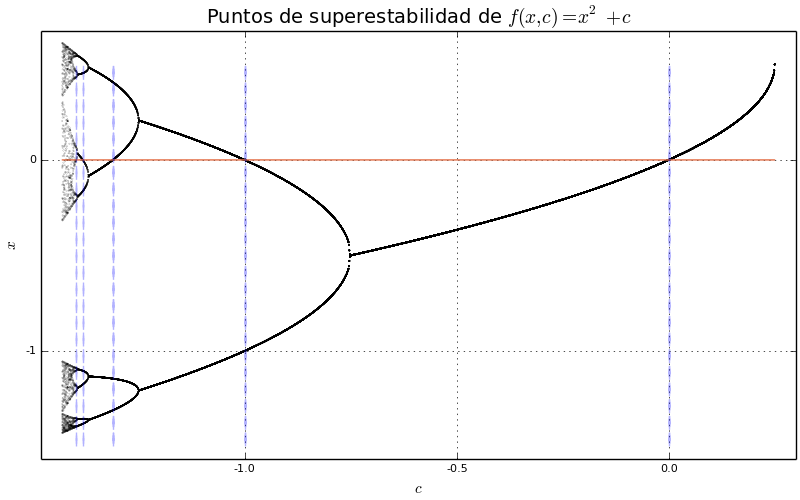

In [30]:
c_parametro, orbita = bifurcation_function(f, 0.5, 1000, -1.43:1e-3:0.25, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))
plot!(c_parametro, zeros(length(c_parametro)))
plot!([c_superestables[1] for i in -2:6], -1.5:1, c="blue", line=(0.3, :dash))
plot!([c_superestables[2] for i in -2:6], -1.5:1, c="blue", line=(0.3, :dash))
plot!([c_superestables[3] for i in -2:6], -1.5:1, c="blue", line=(0.3, :dash))
plot!([c_superestables[4] for i in 1:6], -1.5:1.0, c="blue", line=(0.3, :dash))
plot!([c_superestables[5] for i in 1:6], -1.5:1.0, c="blue", line=(0.3, :dash))
title!(L"Puntos de superestabilidad de $f(x,c) = x^2 + c$")


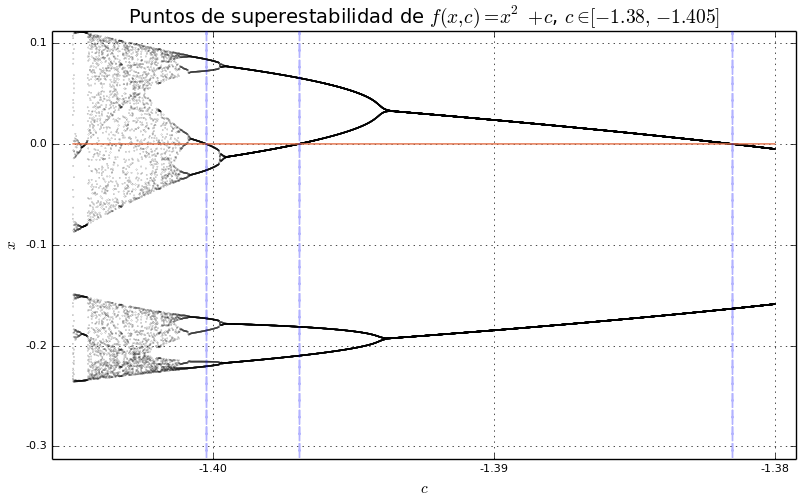

In [29]:
c_parametro, orbita = bifurcation_function(f, 0.5, 1000, -1.405:1e-5:-1.38, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))
plot!(c_parametro, zeros(length(c_parametro)))
plot!([c_superestables[4] for i in -2:6], -1.5:1, c="blue", line=(0.3, :dash))
plot!([c_superestables[5] for i in -2:6], -1.5:1, c="blue", line=(0.3, :dash))
plot!([c_superestables[6] for i in -2:6], -1.5:1, c="blue", line=(0.3, :dash))
ylims!(-0.3, 0.1)
title!(L"Puntos de superestabilidad de $f(x,c) = x^2 + c$, $c \in [-1.38, \ -1.405]$")

In [65]:
f_c = feigenbaum_const(c_superestables)

4-element Array{Float64,1}:
 3.21851
 4.38568
 4.60095
 4.65513

En la siguiente tabla se muestran los primeros valores de $c$ donde hay superestabilidad en las orbitas, junto con su proporción entre las distancias de los puntos de superestabilidad.

| n | Periodo | Bifurcación | Proporción |
|:---------- | ---------- |:------------:|:------------:|
| `1` | 2 | 0.0 | - |
| `2` | 4 | -1.0 | - |
| `3` | 8 | -1.3107 | 3.21851 |
| `4` | 16 | -1.39695 | 4.38568 |
| `5` | 32 | -1.39695 | 4.60095 |
| `6` | 32 | -1.40025 | 4.65513 |

> Parece que la secuencia mostrada en la columna `Proporción` converge a la constante de Feigenbaum. Es decir que se puede calcular la primera constante de Feigenbaum sólamente usando los puntos de superestabilidad, y no sólo los puntos de bifurcaciones. Es más fácil encontrar los puntos de superestabilidad ya que, estos convergen muy rápido al punto fijo u órbita correspondiente, mientras que cerca de los puntos de bifurcación, la convergencia es mucho más lenta.

Ahora calculamos la otra constante de Feigenbaum. Para esto se usan los puntos de superestabilidad, se mide la distancia entre el punto $x=0$ y el más cercano a este. Con estas distancias se calcula la proporción  $\frac{d_{n}}{d_{n+1}}$. En la siguiente gráfica las líneas verdes muestran lo que se quiere calcular.

In [76]:
#Con esto calculo el punto más cercano al punto superestable.

a = Any[]
n = 0

for i in 2:length(c_superestables)
    
    puntos = iterator(itera_funcion_anonym(2^n), 10, 2, 0.0, c_superestables[i])
    push!(a, puntos)
    n += 1
    
end

a   

5-element Array{Any,1}:
 [0.0,-1.0]                                    
 [-2.220446049250313e-16,0.4072387726705178]   
 [2.220446049250313e-16,-0.1634253622082702]   
 [-1.7763568394002505e-15,0.06536337318676555] 
 [1.5543122344752192e-15,-0.026121261182510347]


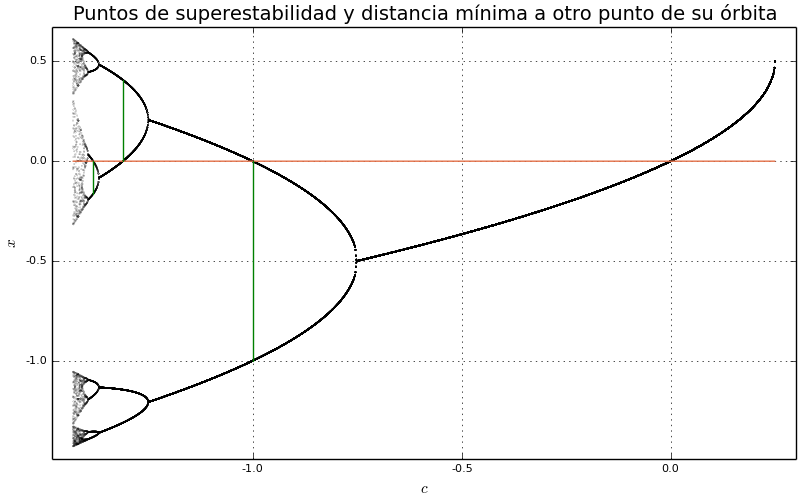

In [78]:
c_parametro, orbita = bifurcation_function(f, 0.5, 1000, -1.43:1e-3:0.25, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))
plot!(c_parametro, zeros(length(c_parametro)))
plot!([c_superestables[2] for i in a[1]], a[1], c="green")
plot!([c_superestables[3] for i in a[2]], a[2], c="green")
plot!([c_superestables[4] for i in a[3]], a[3], c="green")
title!("Puntos de superestabilidad y distancia mínima a otro punto de su órbita")

In [75]:
#Calculamos esas proporciones

α_constant = Float64[]

for i in 1:length(a)-1
    
    α = abs(a[i][2] / a[i+1][2])
    push!(α_constant, α)
    
end

α_constant

4-element Array{Float64,1}:
 2.45556
 2.49189
 2.50026
 2.50231

| Bifurcación | Proporción |
|:------------:|:------------:|
| 0.0 | - |
| -1.0 | - |
| -1.3107 |  2.45556 |
| -1.39695 | 2.49189 |
| -1.39695 | 2.50026 |
|  -1.40025 | 2.50231 |

**Resultados**

> Se puede observar que existe una proporción entre la distancias mínimas de los puntos de superestabilidad. Esta converge a $2.50231$ (según nuestros cálculos).